In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

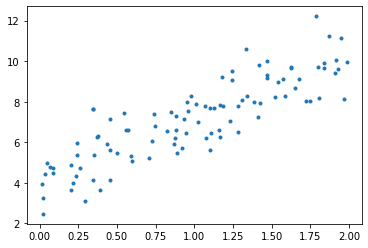

In [6]:
plt.plot(X,y, ".")

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.16771173],
       [3.01683262]])

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [13]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16771173],
       [10.20137698]])

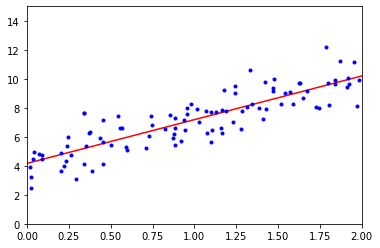

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()

In [23]:
lin_reg.fit(X, y)

LinearRegression()

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([4.16771173]), array([[3.01683262]]))

In [25]:
lin_reg.predict(X_new)

array([[ 4.16771173],
       [10.20137698]])

In [26]:
y_pred = lin_reg.predict(X)

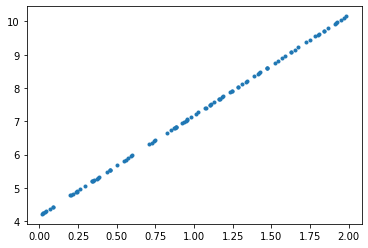

In [27]:
plt.plot(X,y_pred, ".")

In [29]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [30]:
theta_best_svd

array([[4.16771173],
       [3.01683262]])

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[4.16771173],
       [3.01683262]])

In [32]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [33]:
theta = np.random.randn(2,1) # random initialization

In [34]:
theta

array([[-1.84658686],
       [ 1.90239587]])

In [40]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [41]:
theta

array([[4.16771173],
       [3.01683262]])

In [42]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [43]:
def learning_schedule(t):
    return t0 / (t + t1)

In [44]:
theta = np.random.randn(2,1) # random initialization

In [48]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [49]:
theta

array([[4.12179696],
       [3.04399798]])

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [ ]:
sgd_reg.fit(X, y.ravel())

In [52]:
y.ravel()

array([ 6.59786929,  7.68538461,  5.72940239,  3.95088074,  9.22440299,
        8.19353491,  9.6878128 ,  4.12810357,  8.06459919,  9.72362629,
        7.80961592,  8.00190516,  7.16081355,  8.056476  ,  3.25589702,
        8.99459603,  3.66651558,  8.27128701,  6.51747116,  6.23242693,
        5.31993519,  7.78032584,  7.40299677,  7.93126768,  9.62484117,
        7.62234945,  4.87714363,  4.45303512,  8.27437032,  6.55532104,
        6.478745  ,  9.89838937,  6.21347358,  5.21756605,  7.89281042,
        4.79819422,  9.64818584,  7.70879963,  7.2228531 ,  8.01374865,
        7.64809795,  5.38824302,  5.90167789,  7.0251263 ,  8.11142472,
        5.44781195,  9.15728026,  7.8171832 ,  4.74863687,  6.60848046,
        3.1213856 ,  5.09644167,  7.79629234,  7.02045629,  6.82036836,
        9.49372758,  9.33621048,  7.30424897,  6.58372382,  6.60646148,
        4.50171576,  7.56301511,  5.63755534,  7.43479456,  9.94943617,
        7.51425853,  9.79388671,  3.66250509,  6.46108502,  9.05

In [54]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [55]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14164279]), array([3.00461031]))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

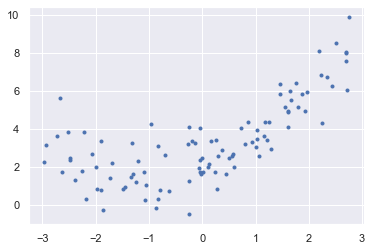

In [9]:
plt.plot(X,y,".")

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [28]:
X_new = np.linspace(-3,3,num=50).reshape(-1, 1)
X_new2 = poly_features.transform(X_new)
y_new =lin_reg.predict(X_new2)

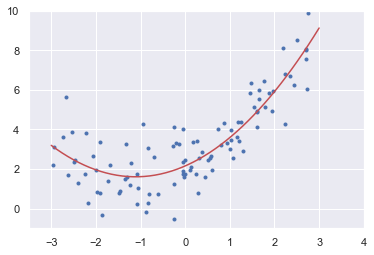

In [31]:
plt.plot(X,y,".")
plt.plot(X_new, y_new, "r-")
plt.axis([-3.5, 4, -1, 10])
plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])        
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

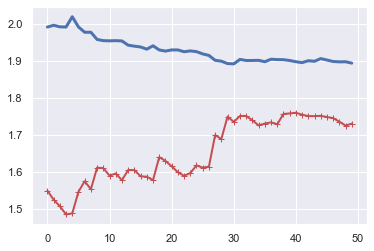

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])

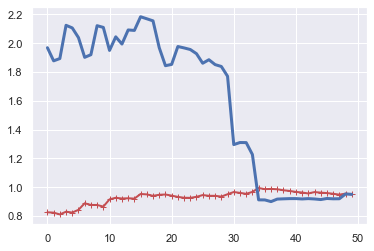

In [30]:
plot_learning_curves(polynomial_regression, X, y)

In [31]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")

In [32]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [33]:
ridge_reg.predict([[1.5]])

array([[5.50657126]])

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

In [36]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.50594449])